<a href="https://colab.research.google.com/github/avroj1t/Simulations/blob/main/Modelling_SARS_CoV2_Using_SIR_Models_and_RK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

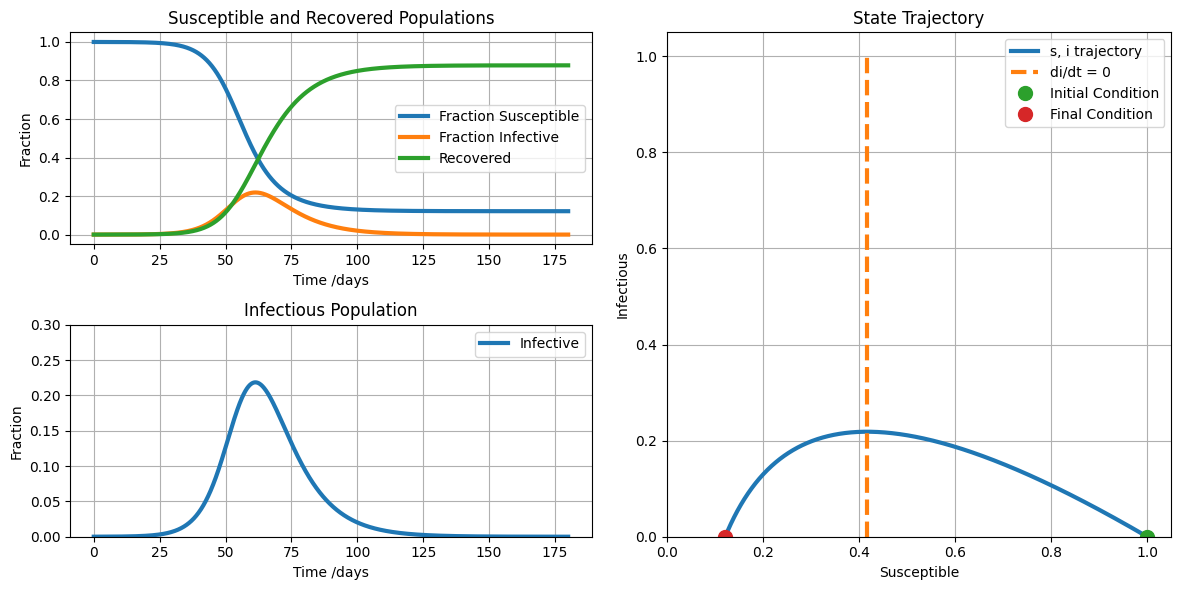

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameter values
R0 = 2.4
t_infective = 5.1 + 3.3

# Initial conditions
i_initial = 1 / 20000
r_initial = 0.0
s_initial = 1 - i_initial - r_initial

gamma = 1 / t_infective
beta = R0 * gamma

# SIR model differential equations
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return [dsdt, didt, drdt]

# Time grid
t = np.linspace(0, 180, 2000)

# Initial values
x_initial = s_initial, i_initial, r_initial

# Solve the system
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T

# Plotting function
def plotdata(t, s, i, e=None):
    fig = plt.figure(figsize=(12, 6))
    ax = [fig.add_subplot(221, axisbelow=True),
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1 / R0, 1 / R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax:
        a.grid(True)
        a.legend()

    plt.tight_layout()

plotdata(t, s, i)


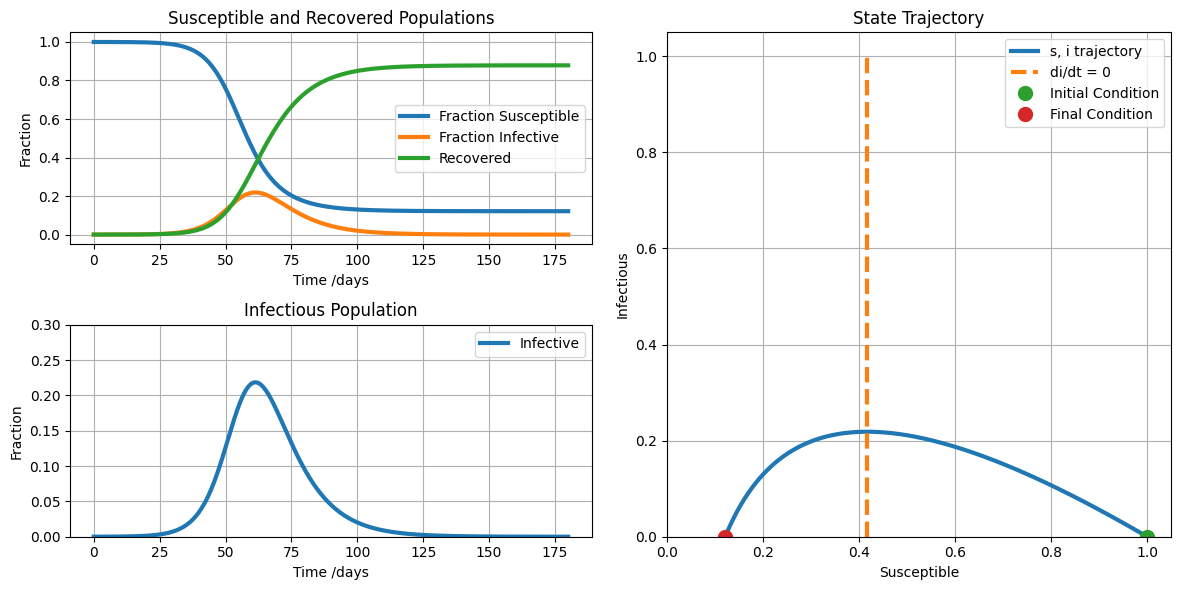

In [7]:
i_initial = 1 / 20000
r_initial = 0.0
s_initial = 1 - i_initial - r_initial

gamma = 1 / t_infective
beta = R0 * gamma

# SIR model differential equations
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return np.array([dsdt, didt, drdt])

# RK4 solver
def rk4_step(f, x, t, dt, *args):
    k1 = f(x, t, *args)
    k2 = f(x + 0.5 * dt * k1, t + 0.5 * dt, *args)
    k3 = f(x + 0.5 * dt * k2, t + 0.5 * dt, *args)
    k4 = f(x + dt * k3, t + dt, *args)
    return x + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

# Time grid
t = np.linspace(0, 180, 2000)
dt = t[1] - t[0]

# Initial values
x = np.array([s_initial, i_initial, r_initial])
s, i, r = [], [], []

# Iterate over time steps
for time in t:
    s.append(x[0])
    i.append(x[1])
    r.append(x[2])
    x = rk4_step(deriv, x, time, dt, beta, gamma)

s, i, r = np.array(s), np.array(i), np.array(r)

# Plotting function
plotdata(t, s, i)